11490434/11490434 [==============================] - 1s 0us/step
(60000,)


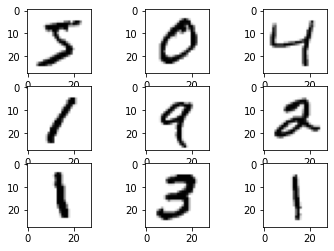

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape)

from matplotlib import pyplot
fig , axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
       axs[i, j].imshow(x_train[cnt], cmap='gray_r')
       cnt += 1
 





In [2]:
num_labels = len(np.unique(y_train))
 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
  
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size)
 

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
print(x_train.shape)

784
(60000, 784)


In [3]:
batch_size = 128
hidden_units = 256
dropout = 0.45
 

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
#model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)
print(x_train.shape)
print(y_train.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.3514 - accuracy: 0.8945
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1593 - accuracy: 0.9510
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1250 - accuracy: 0.9618
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1034 - accuracy: 0.9674
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0927 - accuracy: 0.9709
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0815 - accuracy: 0.9734
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0757 - accuracy: 0.9754
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0716 - accuracy: 0.9765
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0686 - accuracy: 0.9775
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0616 - accuracy: 0.980